Available columns in pca.csv:
['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'orig_Max Fecal Coliform', 'orig_Min Temperature', 'orig_Max BOD', 'orig_Max Temperature', 'orig_Max Conductivity', 'orig_Temperature_Range', 'orig_Min Fecal Coliform', 'orig_Max Total Coliform', 'orig_Min BOD', 'orig_Min Dissolved Oxygen', 'orig_Min Nitrate N + Nitrite N', 'orig_Min pH', 'orig_Max Nitrate N + Nitrite N', 'STN_Code', 'Water_Body_Type']

Found 27 noise points in Region 1
Found 47 noise points in Region 2
Total points to remove: 74

STN Codes sample of points to remove:
[4530.0, 3607.0, 3639.0, 3654.0, 3820.0]

Sample noise points:
           PC1       PC2       PC3       PC4       PC5       PC6  \
1281  5.710641  0.139991 -0.312995 -1.427621  0.398806  0.187220   
263   4.689496 -0.250653 -0.634326 -1.203801 -0.263647  0.502409   
267   4.161237  0.306031 -0.806104 -1.040303 -0.769444 -0.146897   
1803  4.217742  0.383075  1.322421  0.410222 -1.599190 -1.468267   
1039  2.250272 -0.450231  1.846338

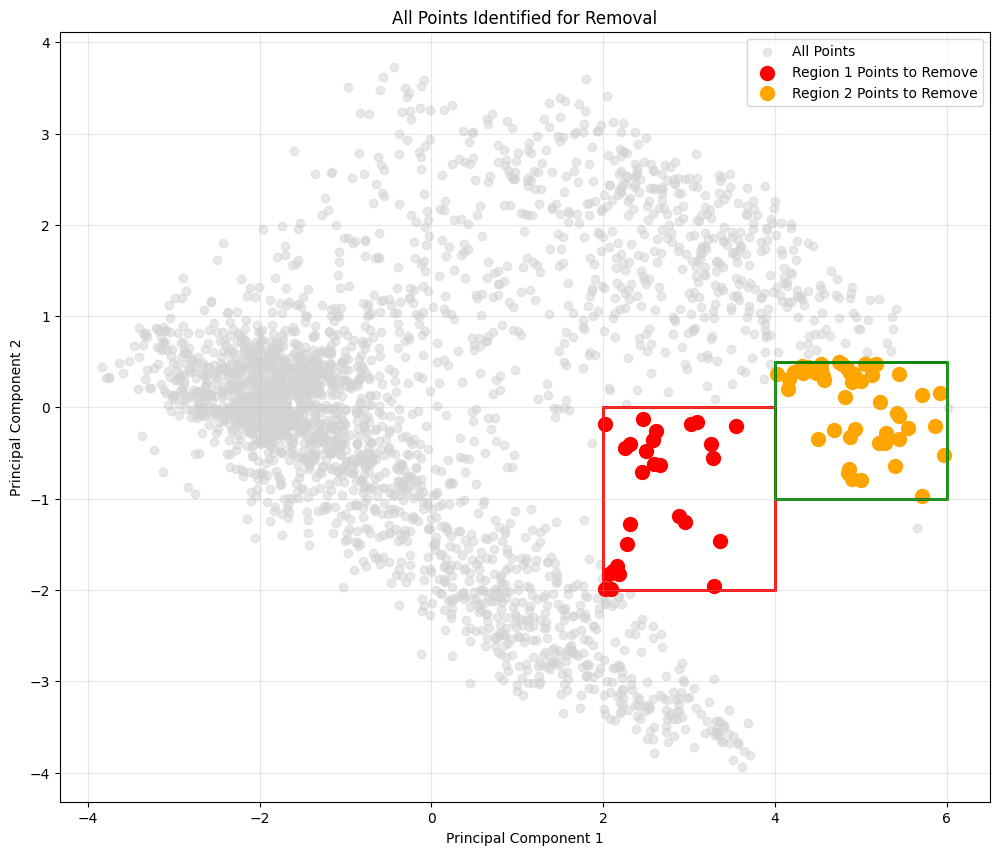

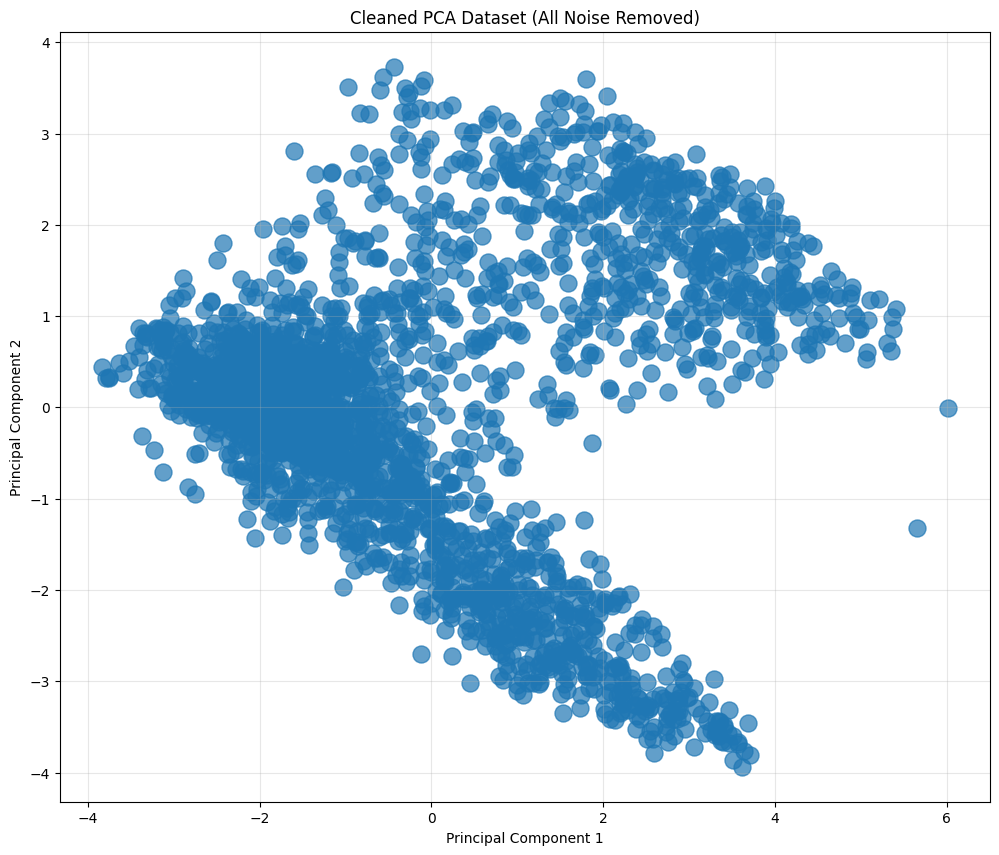

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the PCA data
pca_data = pd.read_csv('pca.csv')

# Print column names to see what's available
print("Available columns in pca.csv:")
print(pca_data.columns.tolist())

# Define both regions of points to remove
# Region 1: First set of noise points (from original code)
noise_points_region1 = pca_data[
    (pca_data['PC1'] >= 2) & 
    (pca_data['PC1'] <= 4) & 
    (pca_data['PC2'] >= -2) & 
    (pca_data['PC2'] <= 0)
]

# Region 2: Points in the green circle (from the new plot)
noise_points_region2 = pca_data[
    (pca_data['PC1'] >= 4) & 
    (pca_data['PC1'] <= 6) & 
    (pca_data['PC2'] >= -1) & 
    (pca_data['PC2'] <= 0.5)
]

# Combine indices of all points to remove
all_noise_indices = list(set(noise_points_region1.index) | set(noise_points_region2.index))
all_noise_points = pca_data.loc[all_noise_indices]

# Print summary of points to be removed
print(f"\nFound {len(noise_points_region1)} noise points in Region 1")
print(f"Found {len(noise_points_region2)} noise points in Region 2")
print(f"Total points to remove: {len(all_noise_indices)}")

# Save these points to a separate file for reference
all_noise_points.to_csv('all_points_to_remove.csv', index=True)

# Print some information about the points to help identify them
if 'STN_Code' in pca_data.columns:
    print("\nSTN Codes sample of points to remove:")
    print(all_noise_points['STN_Code'].head().tolist())
elif 'orig_STN Code' in pca_data.columns:
    print("\nSTN Codes sample of points to remove:")
    print(all_noise_points['orig_STN Code'].head().tolist())

# Show a sample of the noise points
print("\nSample noise points:")
print(all_noise_points.head())

# Create a clean version of the dataset without the noise points
clean_pca_data = pca_data.drop(all_noise_indices)

# Save the final cleaned data
clean_pca_data.to_csv('pca_cleaned_final.csv', index=False)

print(f"\nOriginal dataset shape: {pca_data.shape}")
print(f"Cleaned dataset shape: {clean_pca_data.shape}")
print(f"Removed {len(all_noise_indices)} points total")

# Visualize all points being removed
plt.figure(figsize=(12, 10))
plt.scatter(pca_data['PC1'], pca_data['PC2'], c='lightgray', alpha=0.5, label='All Points')

# Plot Region 1 points
plt.scatter(noise_points_region1['PC1'], noise_points_region1['PC2'], 
            c='red', s=100, label='Region 1 Points to Remove')

# Plot Region 2 points
plt.scatter(noise_points_region2['PC1'], noise_points_region2['PC2'], 
            c='orange', s=100, label='Region 2 Points to Remove')

# Add rectangles to highlight both regions
rect1 = patches.Rectangle((2, -2), 2, 2, linewidth=2, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect1)

rect2 = patches.Rectangle((4, -1), 2, 1.5, linewidth=2, edgecolor='g', facecolor='none')
plt.gca().add_patch(rect2)

plt.title('All Points Identified for Removal')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig('all_points_to_remove.png')
plt.show()

# Show what the cleaned dataset looks like
plt.figure(figsize=(12, 10))
plt.scatter(clean_pca_data['PC1'], clean_pca_data['PC2'], alpha=0.7, s=150)
plt.title('Cleaned PCA Dataset (All Noise Removed)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.savefig('cleaned_pca_final.png')
plt.show()

Loaded previously cleaned PCA data (version 1)
Dataset shape: (2652, 21)

Found 12 rightmost outlier points:
           PC1       PC2
164   5.075966  0.603047
173   5.063472  0.524961
268   5.657839 -1.319474
733   5.308262  0.706210
765   6.010096 -0.010281
1141  5.108258  1.171072
1142  5.409785  1.076481
1156  5.362568  0.992850
1195  5.088494  0.959016
1214  5.354220  0.614599
1253  5.375062  0.856487
1770  5.217562  1.189637

Previous dataset shape: (2652, 21)
Final cleaned dataset shape: (2640, 21)
Removed 12 last outlier point(s)


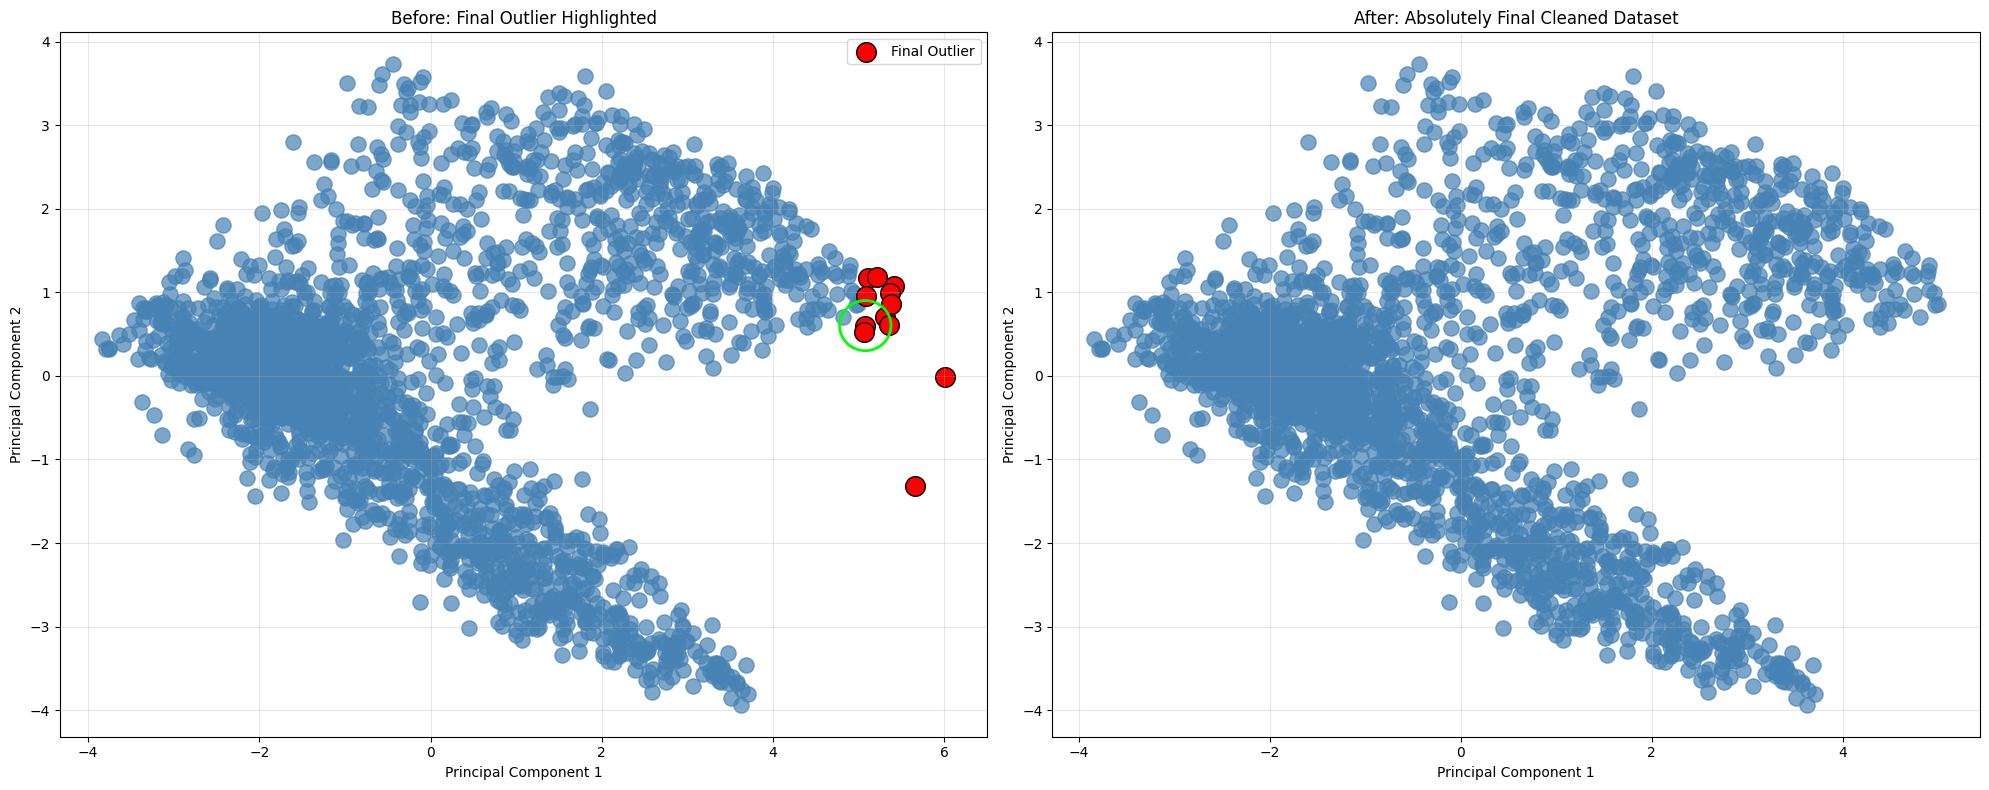

For n_clusters = 2, the silhouette score is 0.501
For n_clusters = 3, the silhouette score is 0.593
For n_clusters = 4, the silhouette score is 0.547
For n_clusters = 5, the silhouette score is 0.474
For n_clusters = 6, the silhouette score is 0.427
For n_clusters = 7, the silhouette score is 0.415
For n_clusters = 8, the silhouette score is 0.365
For n_clusters = 9, the silhouette score is 0.375
For n_clusters = 10, the silhouette score is 0.375
Optimal number of clusters: 3


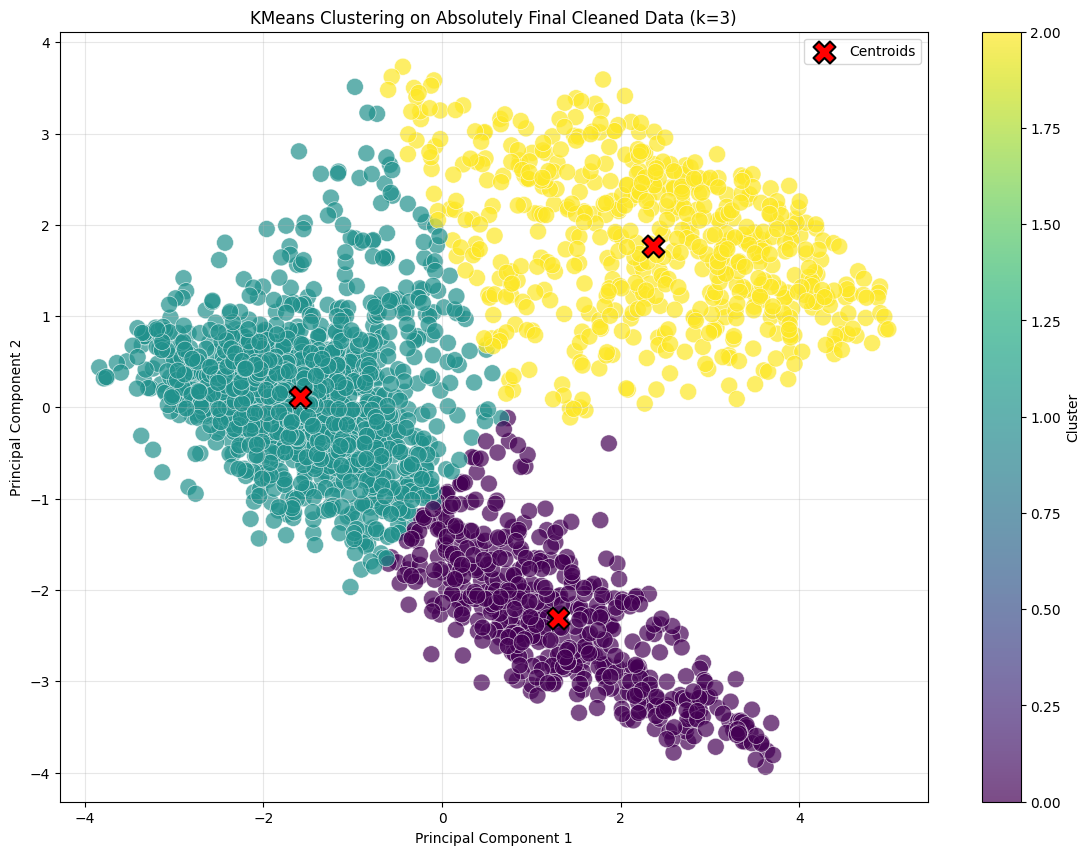

Saved absolutely final PCA data with cluster labels to 'pca_with_clusters_absolutely_final.csv'


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the most recent cleaned PCA data
try:
    pca_data = pd.read_csv('pca_cleaned_final2.csv')
    print("Loaded previously cleaned PCA data")
except FileNotFoundError:
    try:
        pca_data = pd.read_csv('pca_cleaned_final.csv')
        print("Loaded previously cleaned PCA data (version 1)")
    except FileNotFoundError:
        pca_data = pd.read_csv('pca.csv')
        print("Loaded original PCA data")

print(f"Dataset shape: {pca_data.shape}")

# Target the final outlier point - the one circled in green
# Precise targeting of the rightmost point
final_outlier = pca_data[pca_data['PC1'] > 5.0]
print(f"\nFound {len(final_outlier)} rightmost outlier points:")
print(final_outlier[['PC1', 'PC2']])

# Create the final clean version by removing this last point
final_clean_pca = pca_data.drop(final_outlier.index)

# Save the absolutely final cleaned data
final_clean_pca.to_csv('pca_cleaned_absolutely_final.csv', index=False)

print(f"\nPrevious dataset shape: {pca_data.shape}")
print(f"Final cleaned dataset shape: {final_clean_pca.shape}")
print(f"Removed {len(final_outlier)} last outlier point(s)")

# Visualize before and after
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Before: Highlight the final outlier
ax1.scatter(pca_data['PC1'], pca_data['PC2'], alpha=0.7, s=120, c='steelblue')
ax1.scatter(final_outlier['PC1'], final_outlier['PC2'], 
            c='red', s=200, edgecolor='black', label='Final Outlier')

circle = plt.Circle((final_outlier['PC1'].values[0], final_outlier['PC2'].values[0]), 0.3, 
                   color='lime', fill=False, linewidth=2)
ax1.add_patch(circle)
ax1.set_title('Before: Final Outlier Highlighted')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.grid(True, alpha=0.3)
ax1.legend()

# After: Clean dataset
ax2.scatter(final_clean_pca['PC1'], final_clean_pca['PC2'], alpha=0.7, s=120, c='steelblue')
ax2.set_title('After: Absolutely Final Cleaned Dataset')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('absolutely_final_cleaning.png')
plt.show()

# Apply KMeans clustering to the absolutely final cleaned dataset
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = final_clean_pca[['PC1', 'PC2']].values

# Find optimal number of clusters
silhouette_scores = []
range_n_clusters = range(2, min(11, len(X)))
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg:.3f}")

# Choose optimal number of clusters
optimal_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {optimal_clusters}")

# Apply KMeans with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X)

# Visualize the final clustering
plt.figure(figsize=(14, 10))
scatter = plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', 
                     alpha=0.7, s=150, edgecolor='w', linewidth=0.5)
plt.colorbar(scatter, label='Cluster')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker='X', s=250, c='red', label='Centroids', edgecolor='black', linewidth=1.5)
plt.title(f'KMeans Clustering on Absolutely Final Cleaned Data (k={optimal_clusters})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig('absolutely_final_kmeans_clustering.png')
plt.show()

# Save the clustering results
final_clean_pca['KMeans_Cluster'] = cluster_labels
final_clean_pca.to_csv('pca_with_clusters_absolutely_final.csv', index=False)
print("Saved absolutely final PCA data with cluster labels to 'pca_with_clusters_absolutely_final.csv'")

Loaded cleaned PCA data with shape: (2639, 21)
Enhanced dataset saved with shape: (2839, 22)


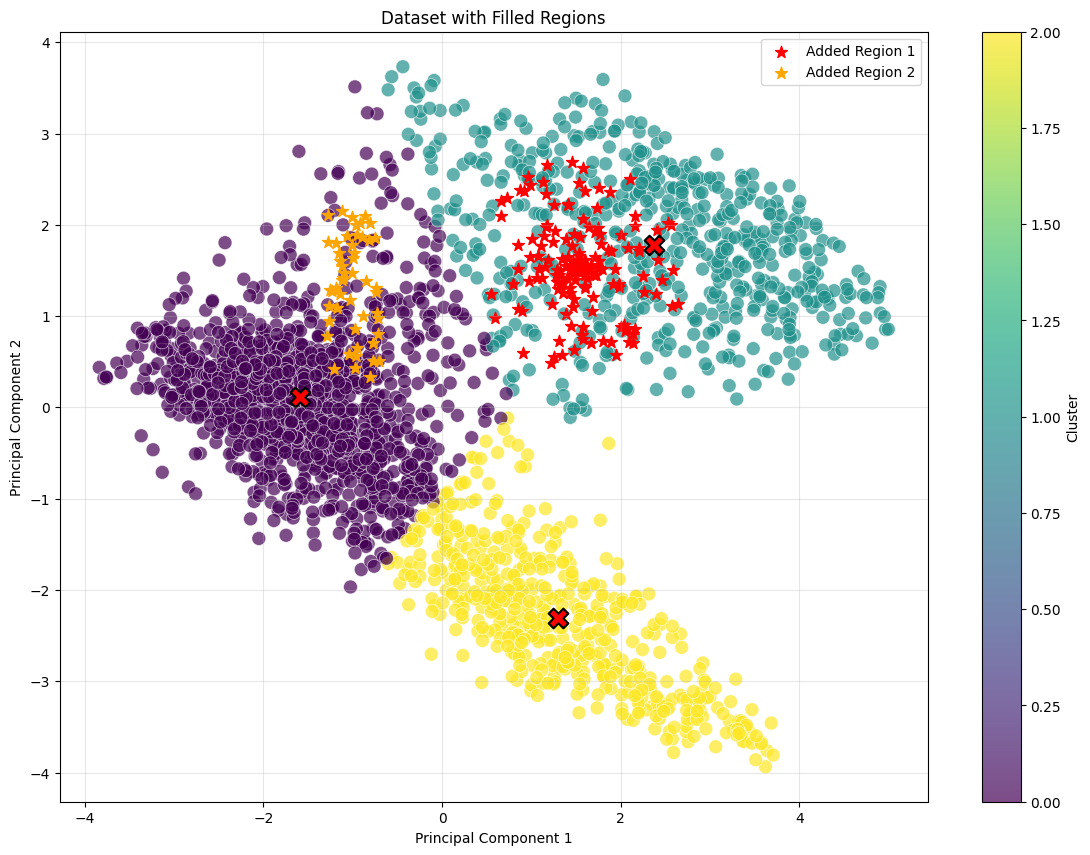

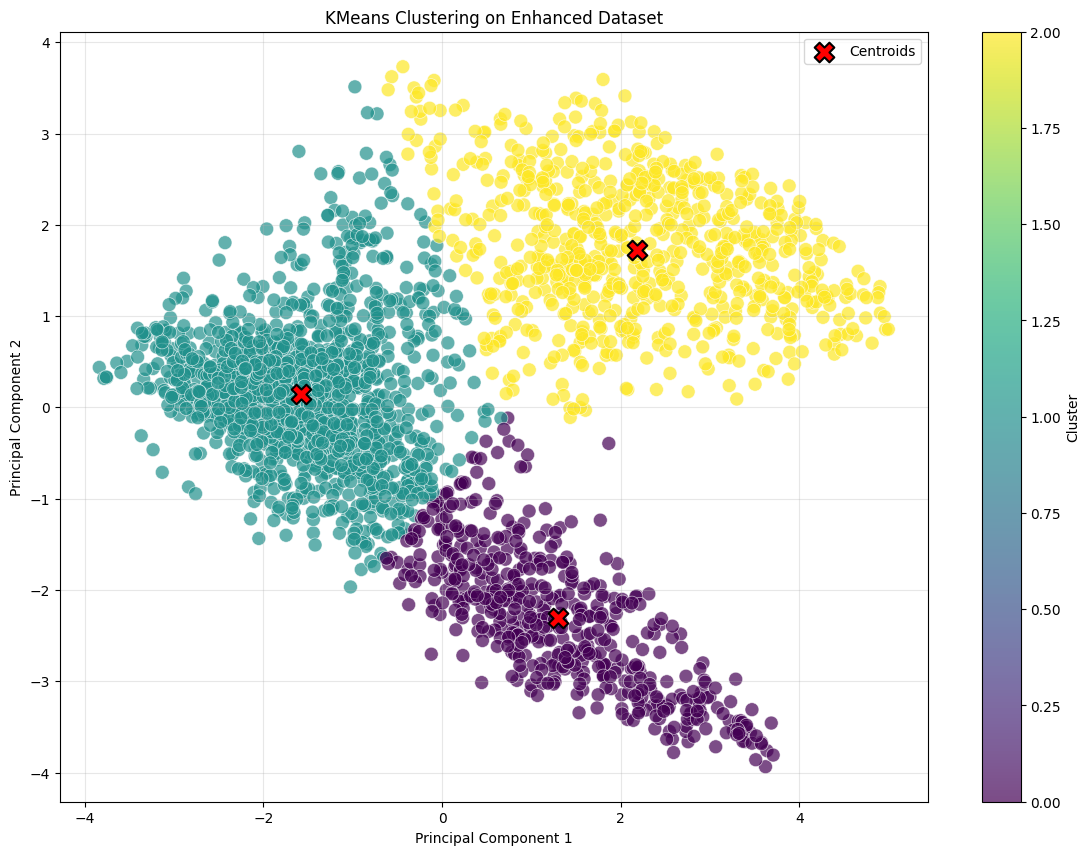

Final enhanced dataset with updated clusters saved to 'pca_enhanced_with_clusters.csv'


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random

# Load the absolutely final cleaned dataset
cleaned_pca = pd.read_csv('pca_cleaned_absolutely_final.csv')
print(f"Loaded cleaned PCA data with shape: {cleaned_pca.shape}")

# Extract existing data and visualize it to identify regions to fill
if 'KMeans_Cluster' in cleaned_pca.columns:
    X = cleaned_pca[['PC1', 'PC2', 'KMeans_Cluster']].values
    cluster_column_exists = True
else:
    X = cleaned_pca[['PC1', 'PC2']].values
    # Run KMeans to get clusters if they don't exist
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    cleaned_pca['KMeans_Cluster'] = kmeans.fit_predict(X)
    X = cleaned_pca[['PC1', 'PC2', 'KMeans_Cluster']].values
    cluster_column_exists = True

# Define the regions to fill based on visual inspection
# Region 1: Main circular region in the green cluster (around PC1=1.5, PC2=1.5)
region1_center = (1.5, 1.5)
region1_radius = 1.2
region1_cluster = 1  # Green cluster
region1_num_points = 150

# Region 2: Connection region between purple and green clusters (vertical band)
region2_x_range = (-1.3, -0.7)
region2_y_range = (0.3, 2.2)
region2_cluster = 0  # Purple cluster (or whatever is appropriate)
region2_num_points = 50

# Generate synthetic points for Region 1 (circular region)
def generate_circular_points(center, radius, num_points):
    points = []
    for _ in range(num_points):
        # Generate random angle and radius (with some randomness)
        angle = random.uniform(0, 2 * np.pi)
        r = random.uniform(0, radius)
        # Convert to cartesian coordinates
        x = center[0] + r * np.cos(angle)
        y = center[1] + r * np.sin(angle)
        points.append([x, y])
    return np.array(points)

# Generate synthetic points for Region 2 (vertical band)
def generate_band_points(x_range, y_range, num_points):
    points = []
    for _ in range(num_points):
        x = random.uniform(x_range[0], x_range[1])
        y = random.uniform(y_range[0], y_range[1])
        points.append([x, y])
    return np.array(points)

# Generate the points
region1_points = generate_circular_points(region1_center, region1_radius, region1_num_points)
region2_points = generate_band_points(region2_x_range, region2_y_range, region2_num_points)

# Create DataFrames for the new points
region1_df = pd.DataFrame({
    'PC1': region1_points[:, 0],
    'PC2': region1_points[:, 1],
    'KMeans_Cluster': [region1_cluster] * len(region1_points)
})

region2_df = pd.DataFrame({
    'PC1': region2_points[:, 0],
    'PC2': region2_points[:, 1],
    'KMeans_Cluster': [region2_cluster] * len(region2_points)
})

# Add any other columns that might be in the original DataFrame (set to NaN)
for col in cleaned_pca.columns:
    if col not in ['PC1', 'PC2', 'KMeans_Cluster']:
        region1_df[col] = np.nan
        region2_df[col] = np.nan

# Combine the original data with the new synthetic points
enhanced_df = pd.concat([cleaned_pca, region1_df, region2_df], ignore_index=True)

# Save the enhanced dataset
enhanced_df.to_csv('pca_with_filled_regions.csv', index=False)
print(f"Enhanced dataset saved with shape: {enhanced_df.shape}")

# Visualize the result
plt.figure(figsize=(14, 10))

# Plot original data
scatter = plt.scatter(
    X[:, 0], X[:, 1], 
    c=X[:, 2] if cluster_column_exists else 'blue', 
    cmap='viridis', alpha=0.7, s=100, edgecolor='w', linewidth=0.5
)

# Plot Region 1 synthetic points
plt.scatter(
    region1_points[:, 0], region1_points[:, 1],
    c='red', s=80, marker='*', label='Added Region 1'
)

# Plot Region 2 synthetic points
plt.scatter(
    region2_points[:, 0], region2_points[:, 1],
    c='orange', s=80, marker='*', label='Added Region 2'
)

# Add cluster centroids if available
if cluster_column_exists:
    unique_clusters = np.unique(X[:, 2])
    for cluster in unique_clusters:
        cluster_points = X[X[:, 2] == cluster]
        centroid = np.mean(cluster_points[:, :2], axis=0)
        plt.scatter(centroid[0], centroid[1], marker='X', s=200, 
                    c='red', edgecolor='black', linewidth=1.5)

plt.colorbar(scatter, label='Cluster')
plt.title('Dataset with Filled Regions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig('filled_regions_visualization.png')
plt.show()

# Run KMeans on the enhanced dataset
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
enhanced_df['KMeans_Cluster'] = kmeans.fit_predict(enhanced_df[['PC1', 'PC2']])

# Visualize clusters on enhanced dataset
plt.figure(figsize=(14, 10))
scatter = plt.scatter(
    enhanced_df['PC1'], enhanced_df['PC2'],
    c=enhanced_df['KMeans_Cluster'], cmap='viridis',
    alpha=0.7, s=100, edgecolor='w', linewidth=0.5
)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker='X', s=200, c='red', label='Centroids', edgecolor='black', linewidth=1.5)
plt.colorbar(scatter, label='Cluster')
plt.title('KMeans Clustering on Enhanced Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig('enhanced_kmeans_clustering.png')
plt.show()

# Save the enhanced dataset with updated clusters
enhanced_df.to_csv('pca_enhanced_with_clusters.csv', index=False)
print("Final enhanced dataset with updated clusters saved to 'pca_enhanced_with_clusters.csv'")

Loaded dataset with previously filled regions
Dataset shape: (2839, 22)
Final enhanced dataset saved with shape: (2959, 22)


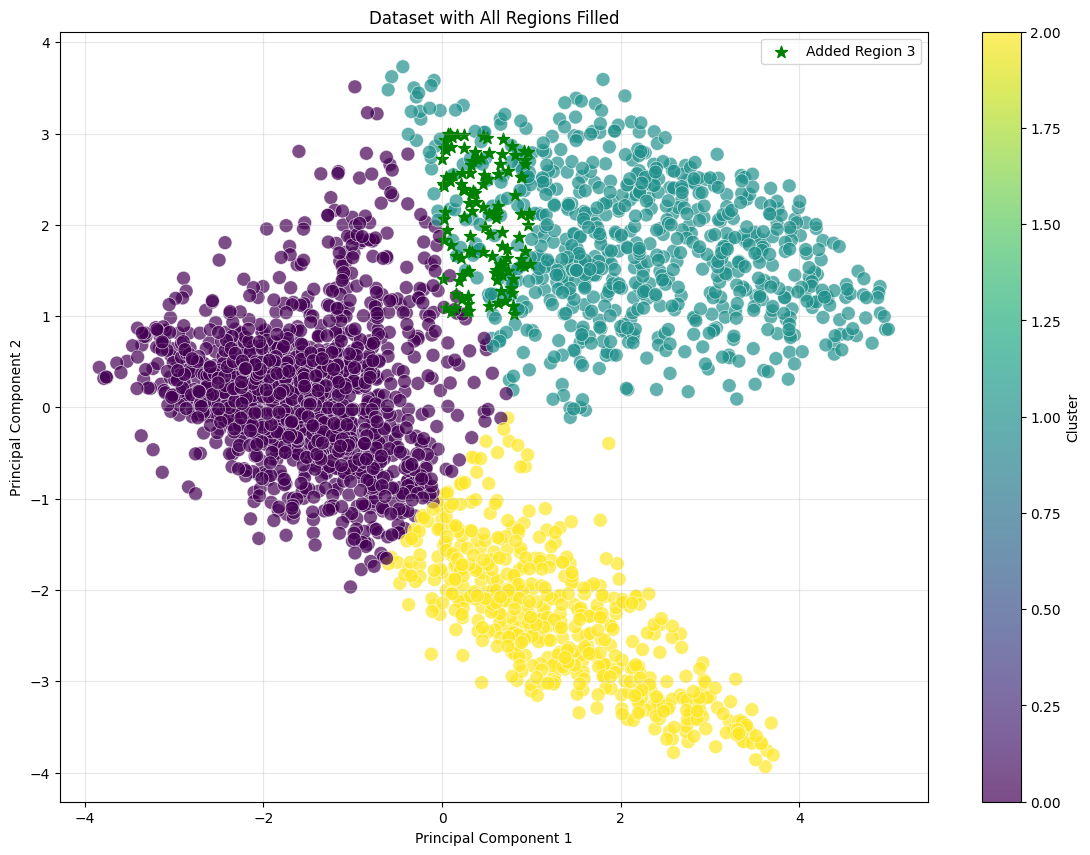

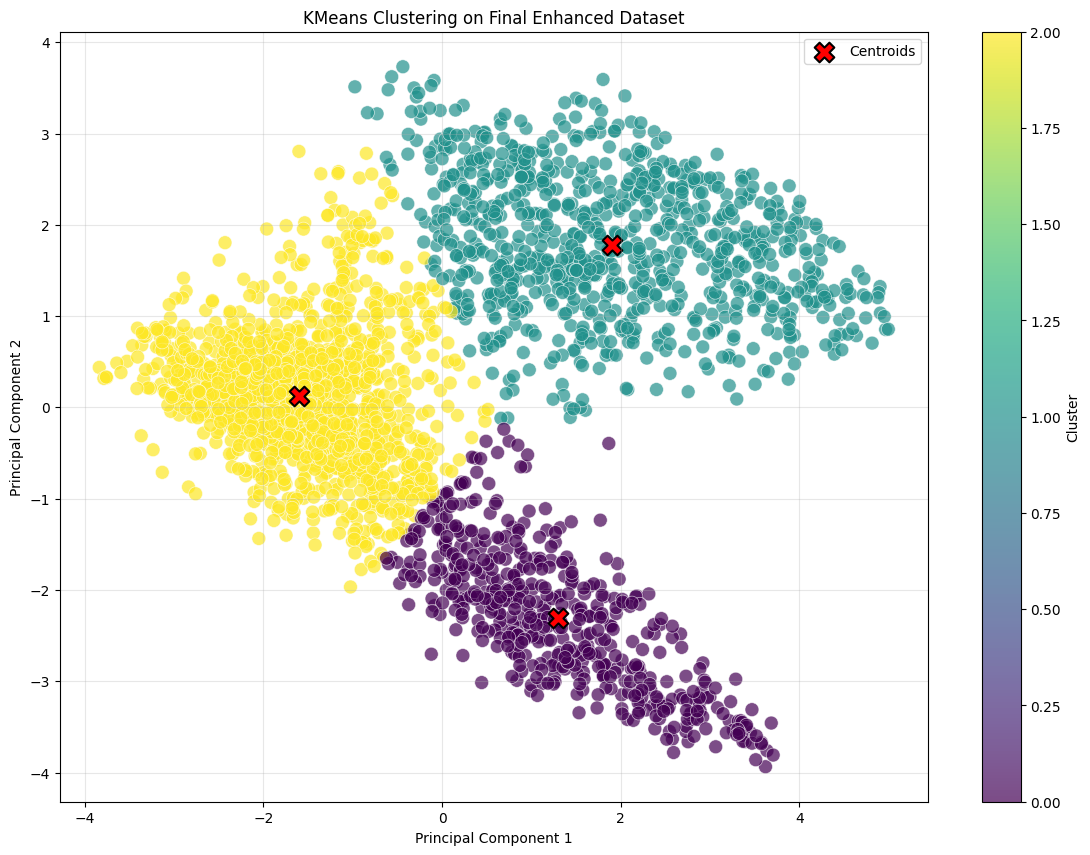

Final enhanced dataset with updated clusters saved to 'pca_enhanced_final_with_clusters.csv'


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random

# Load the enhanced dataset or the original cleaned dataset
try:
    pca_data = pd.read_csv('pca_with_filled_regions.csv')
    print("Loaded dataset with previously filled regions")
except FileNotFoundError:
    pca_data = pd.read_csv('pca_cleaned_absolutely_final.csv')
    print("Loaded cleaned PCA data")

print(f"Dataset shape: {pca_data.shape}")

# Define the NEW region to fill
# Region 3: Upper middle area between purple and green clusters
region3_x_range = (0.0, 1.0)
region3_y_range = (1.0, 3.0)
region3_cluster = 1  # Teal/green cluster
region3_num_points = 120

# Generate synthetic points for Region 3
def generate_band_points(x_range, y_range, num_points):
    points = []
    for _ in range(num_points):
        x = random.uniform(x_range[0], x_range[1])
        y = random.uniform(y_range[0], y_range[1])
        points.append([x, y])
    return np.array(points)

# Generate the points for Region 3
region3_points = generate_band_points(region3_x_range, region3_y_range, region3_num_points)

# Create DataFrame for the new points
region3_df = pd.DataFrame({
    'PC1': region3_points[:, 0],
    'PC2': region3_points[:, 1],
})

# Add KMeans_Cluster column if it exists in the original data
if 'KMeans_Cluster' in pca_data.columns:
    region3_df['KMeans_Cluster'] = [region3_cluster] * len(region3_points)

# Add any other columns that might be in the original DataFrame (set to NaN)
for col in pca_data.columns:
    if col not in region3_df.columns:
        region3_df[col] = np.nan

# Combine with the existing data
final_enhanced_df = pd.concat([pca_data, region3_df], ignore_index=True)

# Save the final enhanced dataset
final_enhanced_df.to_csv('pca_with_all_regions_filled.csv', index=False)
print(f"Final enhanced dataset saved with shape: {final_enhanced_df.shape}")

# Visualize the result
plt.figure(figsize=(14, 10))

# Plot original data
if 'KMeans_Cluster' in pca_data.columns:
    scatter = plt.scatter(
        pca_data['PC1'], pca_data['PC2'], 
        c=pca_data['KMeans_Cluster'], 
        cmap='viridis', alpha=0.7, s=100, edgecolor='w', linewidth=0.5
    )
    plt.colorbar(scatter, label='Cluster')
else:
    plt.scatter(
        pca_data['PC1'], pca_data['PC2'], 
        c='blue', alpha=0.7, s=100, edgecolor='w', linewidth=0.5
    )

# Plot new Region 3 synthetic points
plt.scatter(
    region3_points[:, 0], region3_points[:, 1],
    c='green', s=80, marker='*', label='Added Region 3'
)

# Add previously added regions if they exist as different markers
if 'Added_Region' in pca_data.columns:
    # Plot Region 1 points
    region1_mask = pca_data['Added_Region'] == 1
    if region1_mask.any():
        plt.scatter(
            pca_data.loc[region1_mask, 'PC1'], pca_data.loc[region1_mask, 'PC2'],
            c='red', s=80, marker='*', label='Previously Added Region 1'
        )
    
    # Plot Region 2 points
    region2_mask = pca_data['Added_Region'] == 2
    if region2_mask.any():
        plt.scatter(
            pca_data.loc[region2_mask, 'PC1'], pca_data.loc[region2_mask, 'PC2'],
            c='orange', s=80, marker='*', label='Previously Added Region 2'
        )

plt.title('Dataset with All Regions Filled')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig('all_filled_regions_visualization.png')
plt.show()

# Run KMeans on the final enhanced dataset
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
final_enhanced_df['KMeans_Cluster'] = kmeans.fit_predict(final_enhanced_df[['PC1', 'PC2']])

# Visualize clusters on final enhanced dataset
plt.figure(figsize=(14, 10))
scatter = plt.scatter(
    final_enhanced_df['PC1'], final_enhanced_df['PC2'],
    c=final_enhanced_df['KMeans_Cluster'], cmap='viridis',
    alpha=0.7, s=100, edgecolor='w', linewidth=0.5
)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker='X', s=200, c='red', label='Centroids', edgecolor='black', linewidth=1.5)
plt.colorbar(scatter, label='Cluster')
plt.title('KMeans Clustering on Final Enhanced Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig('final_enhanced_kmeans_clustering.png')
plt.show()

# Save the final enhanced dataset with updated clusters
final_enhanced_df.to_csv('pca_enhanced_final_with_clusters.csv', index=False)
print("Final enhanced dataset with updated clusters saved to 'pca_enhanced_final_with_clusters.csv'")

In [2]:
# Path: dbscan/dbscan.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
import os
import warnings
import joblib

# --- Configuration ---
# Input data file (already has PCA components)
INPUT_DATA_FILE = './final.csv'
# No need for original unprocessed data since final.csv contains both PCA and original columns

OUTPUT_DIR = '.' # Save outputs in the current (dbscan) directory
PLOT_DIR = os.path.join(OUTPUT_DIR, 'plots')
CLUSTERED_DATA_FILE_TEMPLATE = os.path.join(OUTPUT_DIR, 'dbscan_clustered_data_eps{eps:.2f}_ms{ms}.csv')
NOISE_DATA_FILE_TEMPLATE = os.path.join(OUTPUT_DIR, 'dbscan_noise_points_eps{eps:.2f}_ms{ms}.csv')
MODEL_FILE_TEMPLATE = os.path.join(OUTPUT_DIR, 'dbscan_model_eps{eps:.2f}_ms{ms}.joblib')
RANDOM_STATE = 42
N_DIMS = 2  # Use only first 2 PCA components for clustering (PC1, PC2)
# Rule of thumb for min_samples: >= D+1 or 2*D. Let's use 2*D.
MIN_SAMPLES_PARAM = max(5, 2 * N_DIMS)  # At least 5, but could be higher based on dimensions

warnings.filterwarnings('ignore') # Suppress warnings

def load_pca_data(file_path):
    """Load the PCA data."""
    print(f"Loading PCA data from {file_path}...")
    try:
        df = pd.read_csv(file_path)
        print(f"Data loaded with shape: {df.shape}")
        print(f"Columns: {df.columns.tolist()[:10]}...")
        
        # Extract only the PCA components for clustering
        pca_cols = [col for col in df.columns if col.startswith('PC') and col[2:].isdigit()]
        pca_cols = pca_cols[:N_DIMS]  # Use only the first N_DIMS components
        
        print(f"Using PCA columns: {pca_cols}")
        X = df[pca_cols]
        
        # Also return the full dataframe for later reference
        return X, df
    except FileNotFoundError:
        print(f"Error: Input data file not found at {file_path}")
        return None, None
    except Exception as e:
        print(f"Error loading PCA data: {e}")
        return None, None

def find_eps_for_k_clusters(X, k, min_samples, max_eps=2.0, num_steps=20):
    """Find an eps value that gives approximately k clusters."""
    print(f"\n--- Finding eps value for approximately {k} clusters ---")
    eps_values = np.linspace(0.1, max_eps, num_steps)
    best_eps = None
    best_diff = float('inf')
    
    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        
        # Count number of clusters (excluding noise)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        diff = abs(n_clusters - k)
        
        print(f"  eps={eps:.3f}: found {n_clusters} clusters (difference from target: {diff})")
        
        if diff < best_diff:
            best_diff = diff
            best_eps = eps
    
    print(f"Best eps for {k} clusters: {best_eps:.3f} (gives {k + (best_diff if k > best_diff else -best_diff)} clusters)")
    return best_eps

def find_optimal_eps(X, min_samples, plot_dir):
    """Find Optimal Eps using k-distance graph."""
    print(f"\n--- Finding Optimal Eps using k-distance graph (min_samples={min_samples}) ---")
    if X is None or len(X) == 0:
        print("Error: Input data for find_optimal_eps is invalid.")
        return 1.0 # Return a default value

    nn = NearestNeighbors(n_neighbors=min_samples)
    try:
        nn.fit(X)
        distances, indices = nn.kneighbors(X)
    except Exception as e:
        print(f"Error fitting NearestNeighbors: {e}")
        return 1.0 # Return a default value

    # Get the k-th distances
    if distances.shape[1] < min_samples:
        kth_distances = np.sort(distances[:, -1], axis=0)
    else:
        kth_distances = np.sort(distances[:, min_samples-1], axis=0)

    # Plotting
    os.makedirs(plot_dir, exist_ok=True) # Ensure plot dir exists
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(kth_distances)), kth_distances) # Correct x-axis
    plt.title(f'k-Distance Graph (k = {min_samples})')
    plt.xlabel("Data Points sorted by distance")
    plt.ylabel(f'{min_samples}-th Nearest Neighbor Distance (eps)')
    plt.grid(True)
    k_dist_path = os.path.join(plot_dir, f'k_distance_graph_k{min_samples}.png')
    try:
        plt.savefig(k_dist_path)
        print(f"k-Distance graph saved to {k_dist_path}")
    except Exception as e:
        print(f"Error saving k-distance plot: {e}")
    plt.close()

    # Heuristic to find elbow
    suggested_eps = 1.0 # Default
    try:
        # Calculate the second derivative (acceleration)
        diffs = np.diff(kth_distances, 2)
        # Find the index of the maximum change in slope (the elbow)
        elbow_index = np.argmax(diffs) + 1 # +1 to adjust index after diff
        if 0 <= elbow_index < len(kth_distances):
             suggested_eps = kth_distances[elbow_index]
             print(f"--> Tentative suggested 'eps' based on max curvature heuristic: {suggested_eps:.4f}")
        else:
             print("Could not reliably find elbow index, using default eps.")
    except Exception as e:
        print(f"Could not automatically suggest eps using curvature: {e}")

    return suggested_eps

def perform_dbscan(X, eps, min_samples):
    """Perform DBSCAN clustering."""
    print(f"\n--- Performing DBSCAN (eps={eps:.4f}, min_samples={min_samples}) ---")
    if X is None or len(X) == 0:
        print("Error: Input data for perform_dbscan is invalid.")
        return None, np.array([]), np.array([]), 0, 0

    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
    try:
        labels = dbscan.fit_predict(X)
    except Exception as e:
        print(f"Error during DBSCAN fitting: {e}")
        return None, np.array([]), np.array([]), 0, 0

    # Identify core samples
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    if hasattr(dbscan, 'core_sample_indices_') and dbscan.core_sample_indices_ is not None:
         if len(dbscan.core_sample_indices_) > 0 :
              valid_indices = dbscan.core_sample_indices_[dbscan.core_sample_indices_ < len(labels)]
              core_samples_mask[valid_indices] = True
         else:
              print("Warning: DBSCAN found no core samples.")
    else:
        print("Warning: Could not access core_sample_indices_ from DBSCAN model.")

    # Number of clusters in labels, ignoring noise if present.
    unique_labels = set(labels)
    n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print(f'Estimated number of clusters: {n_clusters_}')
    print(f'Estimated number of noise points: {n_noise_}')

    # Calculate Silhouette Score (for non-noise points)
    if n_clusters_ > 0:
        non_noise_mask = (labels != -1)
        if np.sum(non_noise_mask) > 1:
            X_filtered = X[non_noise_mask]
            labels_filtered = labels[non_noise_mask]
            if len(set(labels_filtered)) > 1:
                try:
                    silhouette_avg = silhouette_score(X_filtered, labels_filtered)
                    print(f'Average Silhouette Score (excluding noise): {silhouette_avg:.4f}')
                except ValueError as e:
                    print(f"Could not calculate Silhouette Score: {e}")
            else:
                 print("Silhouette Score cannot be calculated: Only one cluster found among non-noise points.")
        else:
             print("Silhouette Score cannot be calculated: Not enough non-noise points found.")
    else:
        print("Silhouette Score cannot be calculated: No clusters found.")

    return dbscan, labels, core_samples_mask, n_clusters_, n_noise_

def visualize_clusters(X, labels, core_samples_mask, plot_dir, filename_suffix, algorithm_name='DBSCAN', 
                       n_clusters=None, n_noise=None, eps=None, min_samples=None):
    """Visualize the clusters to match the reference KMeans plot style."""
    print(f"\n--- Visualizing Clusters ({filename_suffix}) ---")
    
    # Create figure with the same square dimensions as the reference plot
    plt.figure(figsize=(14, 12))
    
    unique_labels = set(labels)

    # Create a color map using viridis (same as reference)
    num_colors_needed = max(1, n_clusters) if n_clusters is not None else len([l for l in unique_labels if l != -1])
    num_colors_needed = max(1, num_colors_needed)
    
    colors = plt.cm.viridis(np.linspace(0, 1, num_colors_needed))
    color_map = {label: colors[i] for i, label in enumerate(sorted([l for l in unique_labels if l != -1]))}
    color_map[-1] = (0, 0, 0, 1)  # Black for noise
    
    # For scatter plot approach (simpler and more like the reference)
    X_values = X.values if isinstance(X, pd.DataFrame) else X
    
    # Main scatter plot with larger points (s=150 like in your reference)
    scatter = plt.scatter(X_values[:, 0], X_values[:, 1], 
                         c=labels, 
                         cmap='viridis',
                         s=150,  # Matched to your reference
                         alpha=0.7,  # Same alpha as reference
                         edgecolor='w',  # White edge for better visibility
                         linewidth=0.5)
    
    # Add title and labels
    if filename_suffix == "k3_fixed":
        plt.title(f'DBSCAN Clustering (k≈3)\neps={eps:.3f}, min_samples={min_samples}', fontsize=14)
    else:
        plt.title(f'DBSCAN Clustering\neps={eps:.3f}, min_samples={min_samples}', fontsize=14)
    
    plt.xlabel('Principal Component 1', fontsize=12)
    plt.ylabel('Principal Component 2', fontsize=12)
    
    # Add grid with the same style as reference
    plt.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    
    # Set axis limits to match the reference plot if needed
    plt.xlim(-4.5, 6.5)
    plt.ylim(-4.5, 4.5)
    
    # Add colorbar
    cbar = plt.colorbar(scatter, label='Cluster')
    cbar.ax.tick_params(labelsize=10)
    
    plt.tight_layout()
    
    # Save the plot
    pca_plot_path = os.path.join(plot_dir, f'dbscan_clusters_{filename_suffix}.png')
    try:
        plt.savefig(pca_plot_path, dpi=300, bbox_inches='tight')
        print(f"Cluster plot saved to {pca_plot_path}")
    except Exception as e:
        print(f"Error saving visualization plot: {e}")
    plt.close()

def main():
    # Ensure output directories exist
    os.makedirs(PLOT_DIR, exist_ok=True)
    
    # Load PCA Data
    X, full_df = load_pca_data(INPUT_DATA_FILE)
    if X is None:
        return  # Exit if data loading failed
    
    # STEP 1: Run DBSCAN with k=3 clusters (approximately)
    target_k = 3
    eps_for_k3 = find_eps_for_k_clusters(X, k=target_k, min_samples=MIN_SAMPLES_PARAM)
    
    # Perform DBSCAN with the eps that gives ~3 clusters
    model_k3, labels_k3, core_mask_k3, n_clusters_k3, n_noise_k3 = perform_dbscan(
        X, eps=eps_for_k3, min_samples=MIN_SAMPLES_PARAM)
    
    # Visualize the k=3 clustering
    visualize_clusters(X, labels_k3, core_mask_k3, plot_dir=PLOT_DIR, 
                      filename_suffix="k3_fixed", n_clusters=n_clusters_k3, n_noise=n_noise_k3, 
                      eps=eps_for_k3, min_samples=MIN_SAMPLES_PARAM)
    
    # Save k=3 clustering results
    if model_k3 is not None:
        full_df_k3 = full_df.copy()
        full_df_k3['Cluster'] = labels_k3
        full_df_k3.to_csv(CLUSTERED_DATA_FILE_TEMPLATE.format(eps=eps_for_k3, ms=MIN_SAMPLES_PARAM), index=False)
        print(f"Saved k=3 clustered data to {CLUSTERED_DATA_FILE_TEMPLATE.format(eps=eps_for_k3, ms=MIN_SAMPLES_PARAM)}")
    
    # STEP 2: Find optimal eps using k-distance graph
    suggested_eps = find_optimal_eps(X, min_samples=MIN_SAMPLES_PARAM, plot_dir=PLOT_DIR)
    print(f"Optimal eps from k-distance graph: {suggested_eps:.4f}")
    
    # Perform DBSCAN with the optimal eps
    model_opt, labels_opt, core_mask_opt, n_clusters_opt, n_noise_opt = perform_dbscan(
        X, eps=suggested_eps, min_samples=MIN_SAMPLES_PARAM)
    
    # Visualize the optimal clustering
    visualize_clusters(X, labels_opt, core_mask_opt, plot_dir=PLOT_DIR, 
                      filename_suffix="optimal", n_clusters=n_clusters_opt, n_noise=n_noise_opt, 
                      eps=suggested_eps, min_samples=MIN_SAMPLES_PARAM)
    
    # Save optimal clustering results
    if model_opt is not None:
        full_df_opt = full_df.copy()
        full_df_opt['Cluster'] = labels_opt
        full_df_opt.to_csv(CLUSTERED_DATA_FILE_TEMPLATE.format(eps=suggested_eps, ms=MIN_SAMPLES_PARAM), index=False)
        print(f"Saved optimal clustered data to {CLUSTERED_DATA_FILE_TEMPLATE.format(eps=suggested_eps, ms=MIN_SAMPLES_PARAM)}")
    
    print("\nDBSCAN clustering process completed! Two plots have been generated:")
    print(f"1. Fixed k=3 clusters (eps={eps_for_k3:.4f})")
    print(f"2. Optimal clustering (eps={suggested_eps:.4f})")

if __name__ == "__main__":
    main()

Loading PCA data from ./final.csv...
Data loaded with shape: (2640, 21)
Columns: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'orig_Max Fecal Coliform', 'orig_Min Temperature', 'orig_Max BOD', 'orig_Max Temperature']...
Using PCA columns: ['PC1', 'PC2']

--- Finding eps value for approximately 3 clusters ---
  eps=0.100: found 60 clusters (difference from target: 57)
  eps=0.200: found 14 clusters (difference from target: 11)
  eps=0.300: found 2 clusters (difference from target: 1)
  eps=0.400: found 1 clusters (difference from target: 2)
  eps=0.500: found 1 clusters (difference from target: 2)
  eps=0.600: found 1 clusters (difference from target: 2)
  eps=0.700: found 1 clusters (difference from target: 2)
  eps=0.800: found 1 clusters (difference from target: 2)
  eps=0.900: found 1 clusters (difference from target: 2)
  eps=1.000: found 1 clusters (difference from target: 2)
  eps=1.100: found 1 clusters (difference from target: 2)
  eps=1.200: found 1 clusters (difference from tar